In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from numpy import genfromtxt
import pandas as pd
%matplotlib inline

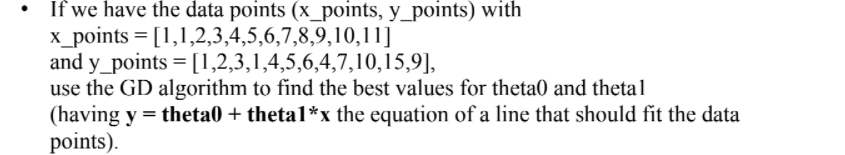

In [2]:
x_points=np.array( [1,1,2,3,4,5,6,7,8,9,10,11]) 
y_points=np.array([1,2,3,1,4,5,6,4,7,10,15,9]) # actual values

In [3]:
def GD(x_points,y_points,eps,alpha,theta0,theta1):
  m=len(x_points)
  grad_norm=1
  grad=0
  loss=0
  while(grad_norm>=eps):
    # compute predicted y
    # compute the grad
    # update theta0,theta1
    y=theta0+theta1*x_points
    #print(y)
    loss=loss_fun(y,y_points)/(2*m) 
    #print(loss)
    theta0=theta0-alpha*np.sum((y-y_points))/m
    #print(theta0)
    theta1=theta1-alpha*np.sum((y-y_points)*(x_points.T))/m
    grad=[np.sum((y-y_points))/m,np.sum((y-y_points)*(x_points.T))/m]

    grad_norm=np.linalg.norm(grad)
  return theta0,theta1

In [4]:
def loss_fun(y_predicted,y_actual):
  return np.sum(((y_predicted-y_actual)**2))

In [5]:
theta0,theta1=GD(x_points,y_points,0.1,0.01,0.1,0.1)
print((theta0,theta1))

(0.1732539945028627, 0.9866556742500548)


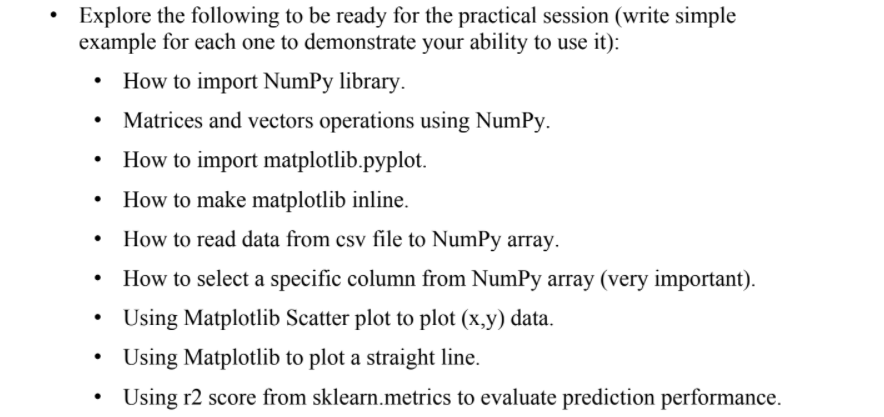

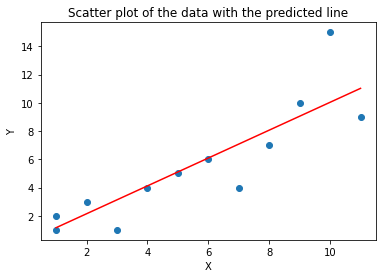

In [6]:
# plot a scatter plot of x & y
plt.scatter(x_points,y_points)
plt.plot(x_points,theta0+theta1*x_points,color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of the data with the predicted line")
plt.show()

In [7]:
# Reading a csv in numpy and store it into array
reading_csv=genfromtxt('/content/sample_data/mnist_test.csv', delimiter=',')
reading_csv[:,1] # selecting col number 1

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
# reading csv using pandas and storing into numpy array
reading_csv=pd.read_csv('/content/sample_data/mnist_test.csv') 
#reading_csv.head(2)
reading_csv.values

array([[2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [9]:
def GD_withpredictions(x_points,y_points,eps,alpha,theta0,theta1):
  m=len(x_points)
  grad_norm=1
  grad=0
  loss=0
  while(grad_norm>=eps):
    # compute predicted y
    # compute the grad
    # update theta0,theta1
    y=theta0+theta1*x_points
    #print(y)
    loss=loss_fun(y,y_points)/(2*m) 
    #print(loss)
    theta0=theta0-alpha*np.sum((y-y_points))/m
    #print(theta0)
    theta1=theta1-alpha*np.sum((y-y_points)*(x_points.T))/m
    grad=[np.sum((y-y_points))/m,np.sum((y-y_points)*(x_points.T))/m]

    grad_norm=np.linalg.norm(grad)
  return theta0,theta1,y

In [10]:
theta1,theta2,y=GD_withpredictions(x_points,y_points,0.1,0.01,0.1,0.1)

In [11]:
# R2 is a linear regression metric used for evaluation of the preformance
r2_score(y_points, y)

0.7550426968385726